In [21]:
from google.cloud import bigquery
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
client = bigquery.Client()

In [23]:
Query = f"""
    SELECT *
    FROM `nft-dashboard-381202.crypto_pipeline.crypto_eth_prices`
    ORDER BY Date ASC
"""
data = client.query(Query).to_dataframe()


In [24]:
data.head()
data.drop_duplicates(subset=['Date'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [29]:
def calculate_VaR(df, window):
    new_df = deepcopy(df)
    # TODO: Validate the formula
    new_df['VaR'] = new_df['Log_Return'].rolling(window).std() * np.sqrt(window) * 1.96
    new_df.dropna(inplace=True)
    new_df.reset_index(drop=True, inplace=True)
    return new_df

VaR = calculate_VaR(data, 30)

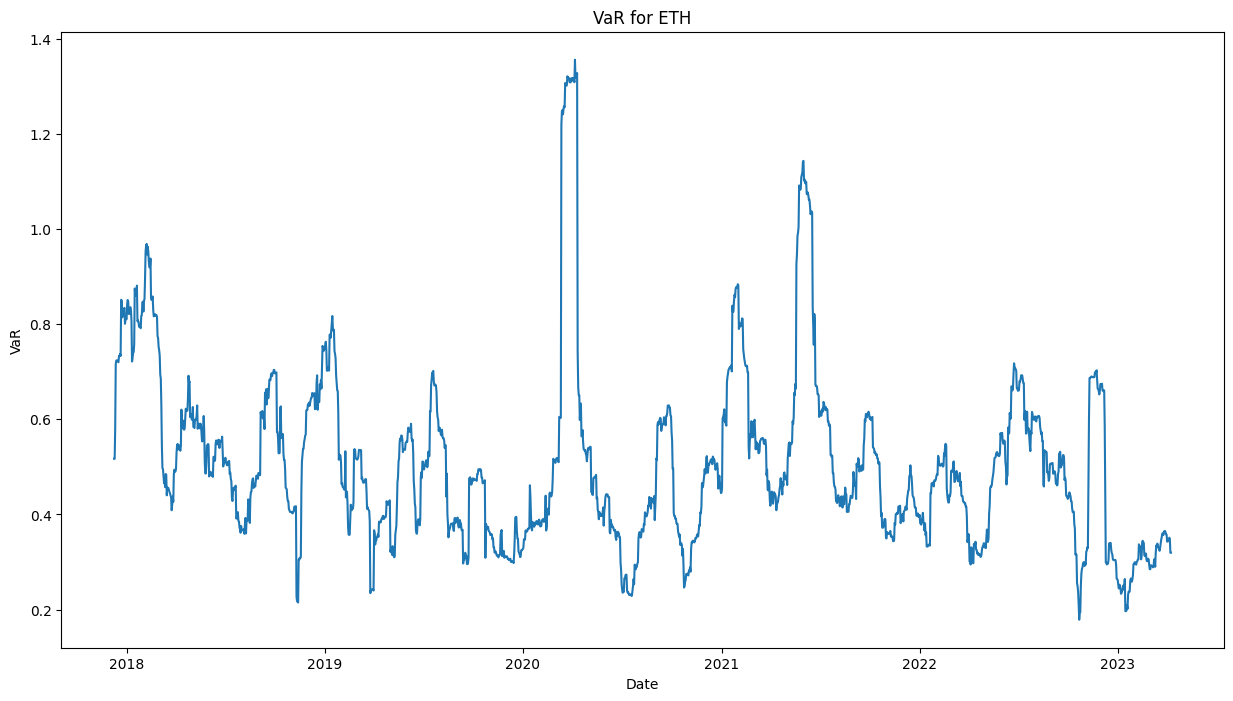

In [30]:
# Plot the VaR for ETH
plt.figure(figsize=(15, 8))
plt.plot(VaR['Date'], VaR['VaR'])
plt.title('VaR for ETH')
plt.xlabel('Date')
plt.ylabel('VaR')
plt.show()